First 5 rows of dataset:
              Country              City  AQI Value AQI Category  CO AQI Value  \
0  Russian Federation        Praskoveya         51     Moderate             1   
1              Brazil  Presidente Dutra         41         Good             1   
2               Italy   Priolo Gargallo         66     Moderate             1   
3              Poland         Przasnysz         34         Good             1   
4              France          Punaauia         22         Good             0   

  CO AQI Category  Ozone AQI Value Ozone AQI Category  NO2 AQI Value  \
0            Good               36               Good              0   
1            Good                5               Good              1   
2            Good               39               Good              2   
3            Good               34               Good              0   
4            Good               22               Good              0   

  NO2 AQI Category  PM2.5 AQI Value PM2.5 AQI Category 

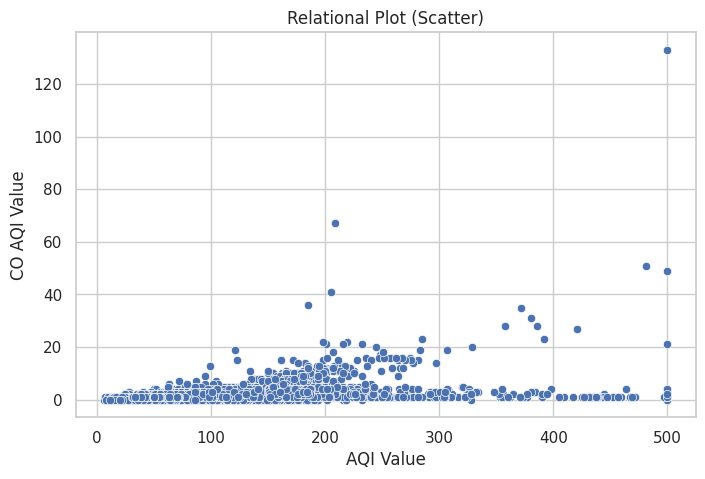

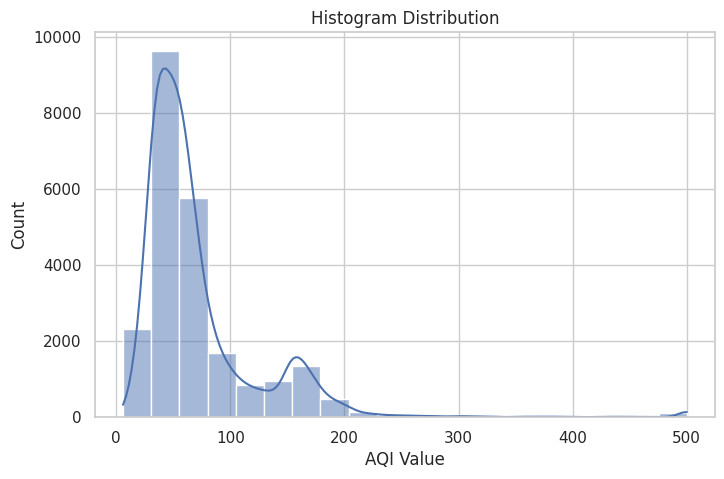

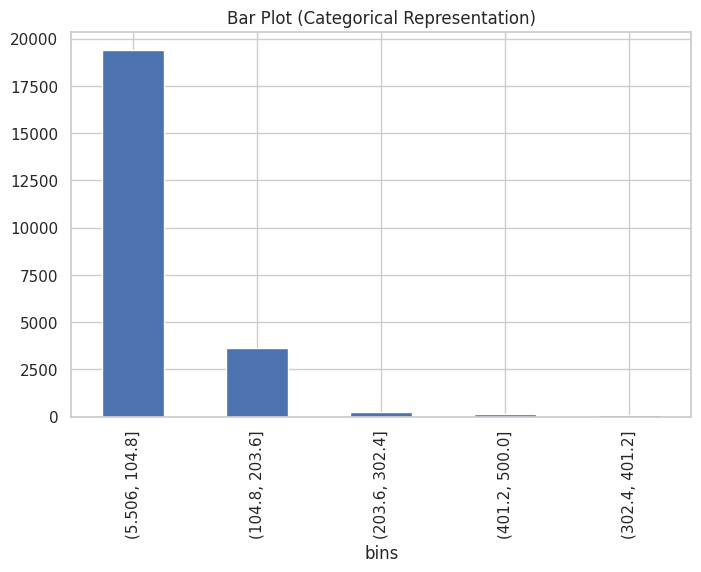

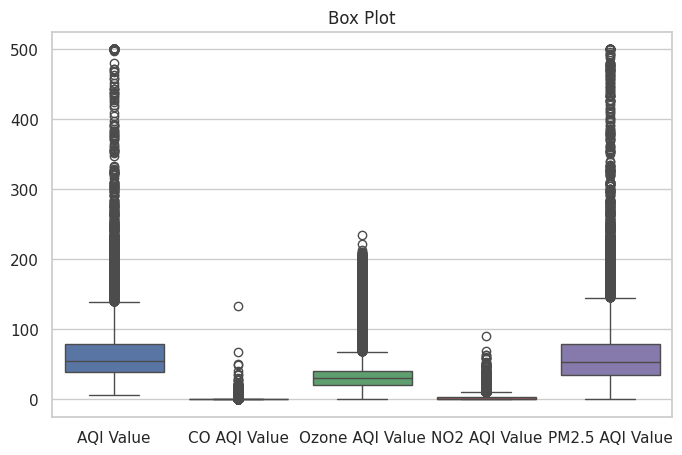

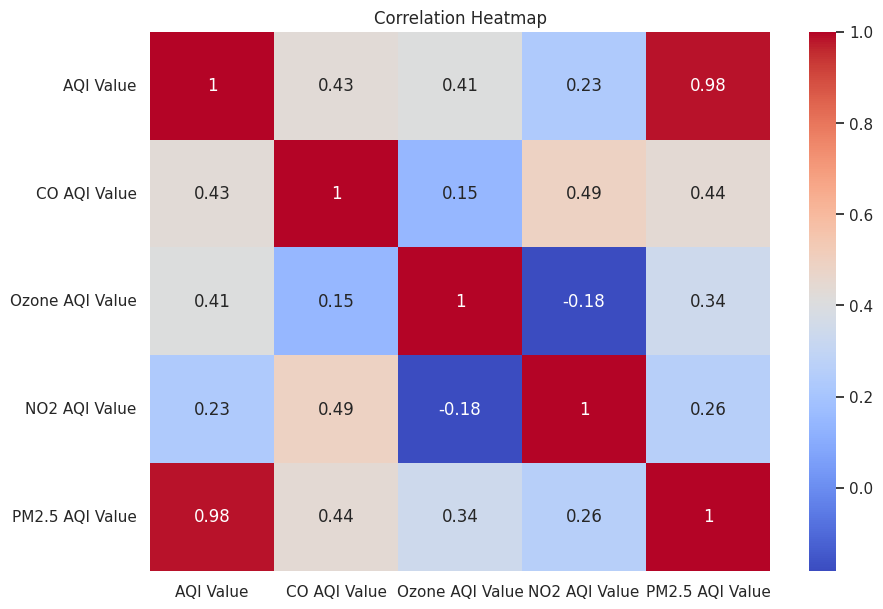


===== Statistical Moments =====

Column: AQI Value
Mean: 72.01086817542513
Variance: 3142.053796556868
Skewness: 3.2887023568935434
Kurtosis: 17.566008469937266

Column: CO AQI Value
Mean: 1.3683672164684824
Variance: 3.35631428837197
Skewness: 23.082756405442357
Kurtosis: 1289.0741901087292

Column: Ozone AQI Value
Mean: 35.19370924434216
Variance: 789.5046068910415
Skewness: 3.101552086286297
Kurtosis: 12.120334047804308

Column: NO2 AQI Value
Mean: 3.0633337595362913
Variance: 27.604478797820438
Skewness: 3.7933850115634162
Kurtosis: 22.428444992006956

Column: PM2.5 AQI Value
Mean: 68.51975450709628
Variance: 3002.5222091712794
Skewness: 2.8230819252729877
Kurtosis: 13.619304475055742

Cleaned dataset saved as cleaned_dataset.csv


In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

# For better plot appearance
sns.set(style="whitegrid")

# 2. Load Dataset

df = pd.read_csv("/content/drive/MyDrive/Resue/Harika dataset.csv")

print("First 5 rows of dataset:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())


# 3. Data Cleaning & Preparation


# Remove duplicate rows
df = df.drop_duplicates()

# Fill missing numeric values with column mean
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Confirm cleaning
print("\nAfter Cleaning Missing Values:")
print(df.isnull().sum())


# 4. Descriptive Statistics

print("\nDescriptive Statistics:")
print(df.describe())

# Mean, Median, Mode
print("\nMean:\n", df.mean(numeric_only=True))
print("\nMedian:\n", df.median(numeric_only=True))
print("\nMode:\n", df.mode().iloc[0])

# Variance & Standard Deviation
print("\nVariance:\n", df.var(numeric_only=True))
print("\nStandard Deviation:\n", df.std(numeric_only=True))


# 5. Relational Plot (Scatter Plot)

# Using first two numeric columns for relationship
num_cols = list(numeric_cols)

plt.figure(figsize=(8,5))
sns.scatterplot(x=df[num_cols[0]], y=df[num_cols[1]])
plt.title("Relational Plot (Scatter)")
plt.xlabel(num_cols[0])
plt.ylabel(num_cols[1])
plt.show()

# 6. Categorical Plot (Histogram)

plt.figure(figsize=(8,5))
sns.histplot(df[num_cols[0]], kde=True, bins=20)
plt.title("Histogram Distribution")
plt.show()

# Bar plot using binned data
df['bins'] = pd.cut(df[num_cols[0]], bins=5)

plt.figure(figsize=(8,5))
df['bins'].value_counts().plot(kind='bar')
plt.title("Bar Plot (Categorical Representation)")
plt.show()


# 7. Statistical Plots


# Box Plot
plt.figure(figsize=(8,5))
sns.boxplot(data=df[numeric_cols])
plt.title("Box Plot")
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10,7))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


# 8. Statistical Moments


print("\n===== Statistical Moments =====")

for col in numeric_cols:
    print(f"\nColumn: {col}")
    print("Mean:", np.mean(df[col]))
    print("Variance:", np.var(df[col]))
    print("Skewness:", skew(df[col]))
    print("Kurtosis:", kurtosis(df[col]))


# 9. Save Cleaned Dataset

df.to_csv("cleaned_dataset.csv", index=False)
print("\nCleaned dataset saved as cleaned_dataset.csv")
